In [3]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\oneel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', context='talk')

In [5]:
# Read in data
df = pd.read_excel("GuttmacherInstituteAbortionDataByState.xlsx")
df.head(5)

,U.S. State,"% change in abortion rate, 2017-2020","% change in the no. of abortion clinics, 2017-2020","% change in the no. of abortion providers, 2014-2017","% of all U.S. abortions, by state of occurrence, 2020","% of counties without a known abortion provider, 2014","% of counties without a known clinic, 2020","% of residents obtaining abortions who traveled out of state for care, 2020","% of women aged 15-44 living in a county without a clinic, 2020","% of women aged 15-44 living in a county without an abortion provider, 2014",...,"No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020","No. of abortions per 1,000 women aged 15–44, by state of residence, 2020","No. of abortions, by state of occurrence, 2020","No. of abortions, by state of residence, 2020","No. of federally funded abortions, 2010","No. of state funded abortions, 2010","Reported public expenditures for abortions (in 000s of dollars), federal, 2015","Reported public expenditures for abortions (in 000s of dollars), state, 2015","Total no. of publicly funded abortions , 2010","Total reported public expenditures for abortions (in 000s of dollars), 2015"
0,Alabama,-6,0,-22,0.6,91,93,47,59,58,...,6.0,9.5,5700,9060,9,0,22,0,9,22
1,Alaska,0,0,-25,0.1,79,87,7,33,17,...,8.6,9.2,1240,1320,0,835,0,216,835,216
2,Arizona,1,0,-8,1.4,80,80,6,18,19,...,9.3,9.7,13320,13820,1,13,28,11,14,40
3,Arkansas,2,-33,0,0.3,97,99,37,86,77,...,5.6,7.8,3250,4510,0,0,0,0,0,0
4,California,17,7,-18,16.6,24,38,0,3,1,...,19.2,19.0,154060,152400,0,88466,0,32613,88466,32613


In [6]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

# Proposition 1: "States that lost abortion clinics saw the largest declines in abortion rates."

## True

In [7]:
df_p1_true = df[['U.S. State', '% change in abortion rate, 2017-2020', '% change in the no. of abortion clinics, 2017-2020']]
df_p1_true = df_p1_true[df_p1_true['% change in the no. of abortion clinics, 2017-2020'] < 0]
df_p1_true['% loss in the no. abortion clinics, 2017-2020'] = df_p1_true['% change in the no. of abortion clinics, 2017-2020'] * -1
print(df_p1_true.head(17))
print(df_p1_true.info())
print(df_p1_true.describe())

        U.S. State  % change in abortion rate, 2017-2020  \
3         Arkansas                                     2   
6      Connecticut                                    -6   
7         Delaware                                    -5   
9          Florida                                     6   
10         Georgia                                    12   
15            Iowa                                    -6   
18       Louisiana                                   -25   
20        Maryland                                     4   
21   Massachusetts                                   -10   
25        Missouri                                   -98   
30      New Jersey                                     4   
32        New York                                    10   
38    Pennsylvania                                     4   
39    Rhode Island                                   -20   
40  South Carolina                                     0   
42       Tennessee                      

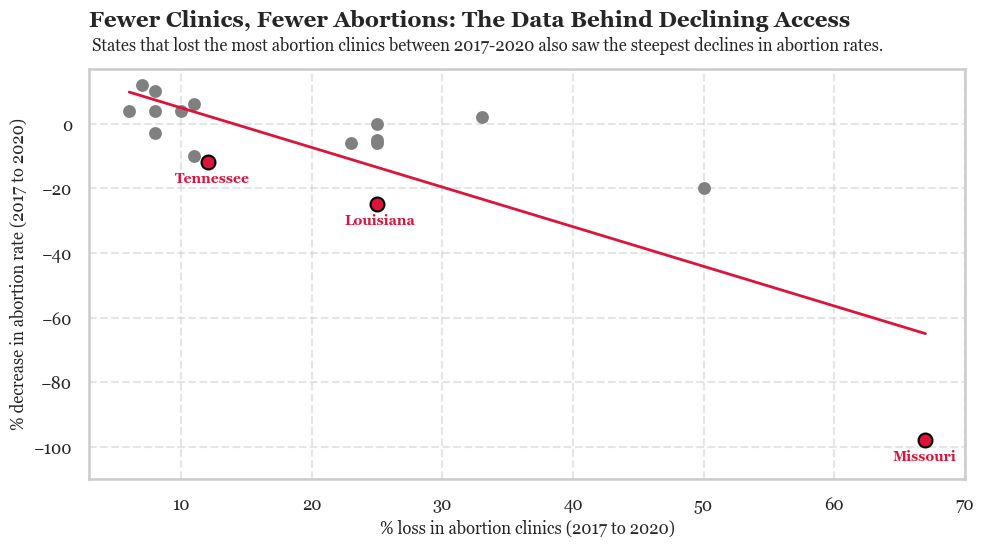

In [49]:
# Styling
plt.rcParams['font.family'] = 'Georgia'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Points to highlight
highlight_labels = ['Missouri', 'Louisiana', 'Tennessee']
highlight_df = df_p1_true[df_p1_true['U.S. State'].isin(highlight_labels)]
other_df = df_p1_true[~df_p1_true['U.S. State'].isin(highlight_labels)]

# Trendline
coeffs = np.polyfit(df_p1_true['% loss in the no. abortion clinics, 2017-2020'], df_p1_true['% change in abortion rate, 2017-2020'], deg=1)
trendline = np.poly1d(coeffs)

# Make figure
plt.figure(figsize=(10,6))

# Base scatter (light gray)
plt.scatter(other_df['% loss in the no. abortion clinics, 2017-2020'], other_df['% change in abortion rate, 2017-2020'], color='gray', s=60, label='Others', edgecolors='gray')
# Highlighted points (accent color)
plt.scatter(highlight_df['% loss in the no. abortion clinics, 2017-2020'], highlight_df['% change in abortion rate, 2017-2020'], color='crimson', s=100, label='Key Points', edgecolors='black')

# Plot trendline
x_vals = np.linspace(df_p1_true['% loss in the no. abortion clinics, 2017-2020'].min(), df_p1_true['% loss in the no. abortion clinics, 2017-2020'].max(), 100)
plt.plot(x_vals, trendline(x_vals), color='crimson', linewidth=2, label='Trendline')

# Add text labels to highlighted points
for _, row in highlight_df.iterrows():
  plt.text(row['% loss in the no. abortion clinics, 2017-2020'] - 2.5, row['% change in abortion rate, 2017-2020'] - 6.5, row['U.S. State'], fontsize=10, weight='bold', color='crimson')

# Formatting
plt.title('Fewer Clinics, Fewer Abortions: The Data Behind Declining Access', pad=30, weight='bold', loc='left', x=0.0)
plt.suptitle('States that lost the most abortion clinics between 2017-2020 also saw the steepest declines in abortion rates.', y=0.865, x=0.1, ha='left', fontsize=12)
plt.xlabel("% loss in abortion clinics (2017 to 2020)", fontsize=12)
plt.ylabel('% decrease in abortion rate (2017 to 2020)', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(-110, (df_p1_true['% change in abortion rate, 2017-2020'].max() + 5))
plt.tight_layout()

plt.show()


## False

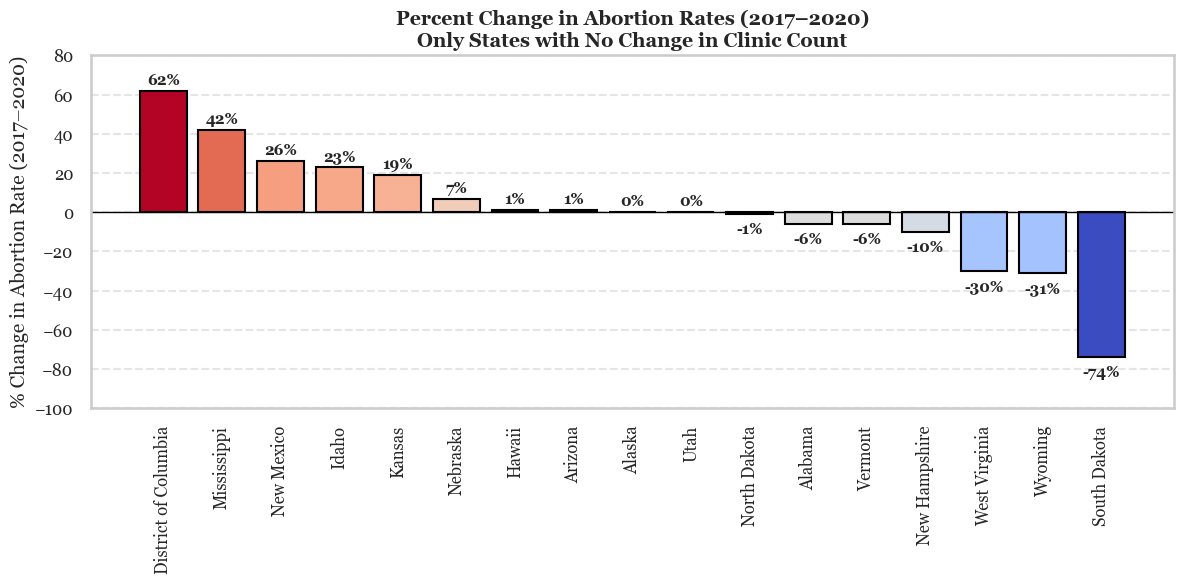

In [ ]:

# Filter: only states where clinic change = 0%
subset = df[df['% change in the no. of abortion clinics, 2017-2020'] == 0].copy()

# Sort by abortion rate change
subset = subset.sort_values('% change in abortion rate, 2017-2020', ascending=False)

# Normalize abortion rate change for color mapping
norm = plt.Normalize(subset['% change in abortion rate, 2017-2020'].min(),
                     subset['% change in abortion rate, 2017-2020'].max())

# Choose a diverging colormap (blue = positive, red/orange = negative)
colors = plt.cm.coolwarm(norm(subset['% change in abortion rate, 2017-2020']))

# --- Plot setup ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    subset['U.S. State'],
    subset['% change in abortion rate, 2017-2020'],
    color=colors,
    edgecolor='black'
)



# --- Labels and formatting ---
plt.title("Percent Change in Abortion Rates (2017–2020)\nOnly States with No Change in Clinic Count", fontsize=14, weight='bold')
plt.ylabel("% Change in Abortion Rate (2017–2020)")
plt.xticks(rotation=90)
plt.grid(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', lw=1)
plt.ylim(-100, 80)
plt.tight_layout()
plt.show()

